In [1]:
using CSV
using DataFrames
using Random
using Plots
using LaTeXStrings
ENV["COLUMNS"] = 1000;

In [4]:
results_exp42 = DataFrame(CSV.File("../../../results/2020-11-01/experiment42/simulatons-10-45-27.csv"));

In [5]:
results_exp42.match_color = map(results_exp42.match_ratio) do x
    if x ≈ 1.0
        return 3
    elseif x >= 0.85
        return 2
    else
        return 1
    end
end;

In [6]:
@show nrow(results_exp42)
first(results_exp42, 3)

nrow(results_exp42) = 142065


,N,n,m,μ′,α,β,δ,beta_params_key,ρe,ρh,ρt,μ,σ,match_ratio,alignment_strength_1,alignment_strength_2,iter,maxiter,sgm_time,distribution,experiment,match_color
,Int64,Int64,Int64,Float64,Float64,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Float64,String,String,Int64
1,1000,1000,0,0.1,1.0,1.0,0.0,A,0.0,0.000111099,0.000111099,0.0999,0.0031607,0.003,0.1389,0.1389,20,20,18.7236,bernoulli,42a,1
2,1000,1000,0,0.1,1.0,1.0,0.02,A,0.0,0.000482365,0.000482365,0.0999138,0.00658632,0.001,0.138881,0.138881,20,20,18.1971,bernoulli,42a,1
3,1000,1000,0,0.1,1.0,1.0,0.04,A,0.0,0.00159271,0.00159271,0.0998814,0.0119663,0.0,0.139608,0.139608,20,20,18.1733,bernoulli,42a,1


In [8]:
sample_rows(df, k) = df[randperm(nrow(df))[1:k],:];

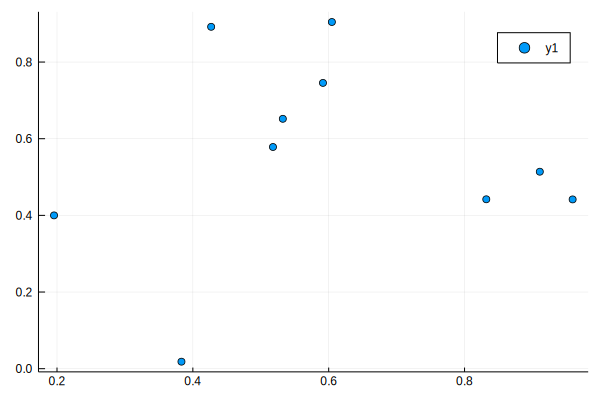

In [49]:
test_fig = plot(
    rand(10),
    rand(10),
    seriestype=:scatter,
    fontfamily="Computer Modern",
)

In [13]:
# pgfplotsx()
gr()

Plots.GRBackend()

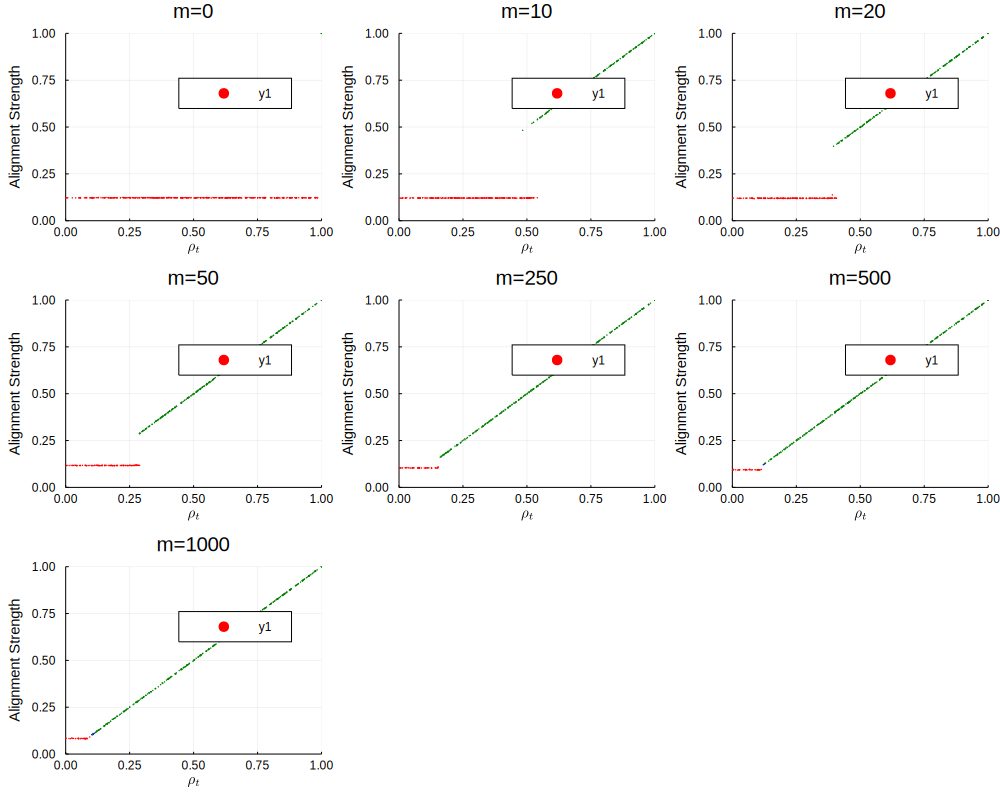

In [77]:
results_exp42_fig1 = filter(row -> (row.μ′ == 0.5), results_exp42)
results_exp42_fig1 = sample_rows(results_exp42_fig1, 3000)
sort!(results_exp42_fig1, [:match_color, :m])
colors = [colorant"red", colorant"blue", colorant"green"]

layers = []
mvals = sort(unique(results_exp42_fig1.m))
for m in mvals
    df = filter(row -> row.m == m, results_exp42_fig1)
    l = plot(
        df.ρt,
        df.alignment_strength_1,
        color=colors[df.match_color],
        seriestype=:scatter,
#         legend=:none,
        markersize=1.0,
        markerstrokewidth=0,
        title="m=$(m)",
    )
    push!(layers, l)
end
fig1 = plot(
    layers...,
    layout=length(mvals),
    size=(1000,800),
    xlim=(0,1),
    ylim=(0,1),
    xticks=(0:0.25:1),
    yticks=(0:0.25:1),
    xlabel=L"\rho_t",
    ylabel="Alignment Strength",
    fontfamily="Computer Modern",
    guidefont = (10, "Computer Modern"),
    legend=true,
)
fig1

In [ ]:
results_exp42_fig1 = filter(row -> (row.μ′ == 0.5), results_exp42)
sort!(results_exp42_fig1, [:match_color, :m])
colors = [colorant"red", colorant"blue", colorant"green"]
fig1 = plot(
    results_exp42_fig1,
    x = :ρt, y = :alignment_strength_1, xgroup = :m, color = :match_color,
    Geom.subplot_grid(Geom.point, Guide.xticks(ticks=0:0.25:1), Guide.yticks(ticks=0:0.25:1)),
    Scale.color_discrete(x -> colors),
    Guide.xlabel("ρ<sub>t</sub> <i>by</i> s"),
    Guide.ylabel("Alignment Strength"),
    Guide.colorkey(title="Match Ratio", labels=["<85%", "≥85%", "100%"]),
    style(
        point_size=0.25mm,
        highlight_width=0mm,
        
        key_title_font = defaultfont,
        key_label_font = defaultfont,
        minor_label_font = defaultfont,
        major_label_font = defaultfont,
        key_title_font_size = 14px,
        key_label_font_size = 12px,
        minor_label_font_size = 14px,
        major_label_font_size = 16px,
    ),
)
fig1 |> SVG(42cm, 10cm);
fig1 |> PGF("exp42_fig1.tex", 42cm, 10cm, texfonts=true);

In [ ]:
results_exp42_fig2 = filter(row -> (row.μ′ == 0.5), results_exp42)
sort!(results_exp42_fig2, [:m, :match_color])
fig2 = plot(
    results_exp42_fig2,
    x = :ρt, y = :alignment_strength_1, color = :m,
    Geom.point,
    Scale.color_discrete,
    Guide.xlabel("ρ<sub>t</sub>"),
    Guide.ylabel("Alignment Strength"),
    Guide.xticks(ticks=0:0.25:1), Guide.yticks(ticks=0:0.25:1),
    Guide.colorkey(title="s"),
    style(
        point_size=0.25mm,
        highlight_width=0mm,
    ),
)
fig2 |> SVG(16cm, 10cm);

In [ ]:
results_exp42_fig3 = filter(row -> (row.μ′ == 0.5) && (row.m == 50), results_exp42)
sort!(results_exp42_fig3, [:match_color])
colors = [colorant"red", colorant"blue", colorant"green"]
fig3 = plot(
    results_exp42_fig3,
    x = :ρe, y = :alignment_strength_1, color = :match_color,
    Geom.point,
    Scale.color_discrete(x -> colors[[1,3]]),
    Guide.xlabel("ρ<sub>e</sub>"),
    Guide.ylabel("Alignment Strength"),
    Guide.xticks(ticks=0:0.25:1), Guide.yticks(ticks=0:0.25:1),
    Guide.manual_color_key("Match Ratio", ["<85%", "≥85%", "100%"], colors, shape=[Shape.square], size=[1.0mm]),
    style(
        key_position=:none,
        point_size=0.25mm,
        highlight_width=0mm,
    ),
)
fig3 |> SVG(16cm, 10cm);